# Lecture 3: Fitting Enzyme Kinetic Parameters from Experimental Data
## CHME 5630 - Spring 2020
This notebook steps through the steps involved in using nonlinear regression to determine kinetic parameters for enzymes from experimental data

We start by importing the libraries we need

We'll use the **curve_fit** function from the **optimize** libraries from SciPy to do the actual data fitting, and 
**Matplotlib** has what we need for generating plots. Finally **numpy** has features we'll use for handling data, as described below

In [22]:
from scipy.optimize import curve_fit
import numpy as np #Importing a library 'as' something allows us to refer to it later without typing out the whole name
import matplotlib.pyplot as plt
%matplotlib inline 
#This line allows matplotlib to output directly to the notebook, so we can see our plots immediately

Now we'll import the data we're going to be using to obtain the kinetic parameters. For now, we'll just enter these manually into an array, but later we'll learn how to import these from a local file to save time. Note that arrays of data are generated with square brackets [], and each datapoint is separated by a comma

In [47]:
substrate_concentration = np.array([0.8, 1.6, 3.2, 6.4, 12.8, 25.6, 51.2, 102.4, 204.8, 409.6, 819.2, 1638.4]) #uM
velocity = np.array([15.44554455, 32.05882353, 53.65384615, 77.77777778, 188.2758621, 349.0909091, 567.804878, 707.3684211, 970.7865169, 1430.588235, 1339.217082, 
1644.692737]) #uM/s




An important point about data handling in Python. In our code, we're defining our data as an **array** by creating it using **np.array()**. You will often see data in Python also stored as lists. Both are valid ways of storing data, but can have different functions performed on them. In general, if you are working with numerical values that will need to be mathematically manipulated, it is better to store them as arrays. Before we do anything else, let's plot these data

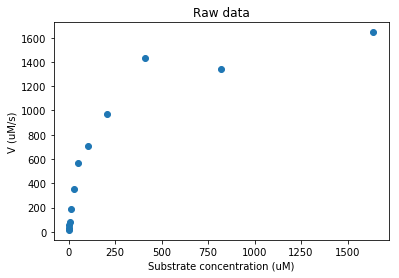

In [48]:
plt.scatter(substrate_concentration,velocity) #Generic function for creating a scatter plot
plt.xlabel('Substrate concentration (uM)') #Labeling the axes
plt.ylabel('V (uM/s)')
plt.title('Raw data') #Giving the plot a title

Now we'll fit the data using least-squares regression. In Excel, we implemented this explicitly, but the Scipy optimize package allows us to do this much more easily. First, we define our Michaelis-Menten function:

In [49]:
def v(s, v_max, km): #Defines a function v that takes as inputs s, v_max, and km. The first argument must ALWAYS be the independent variable for the subsequent code to work
    return v_max * (s / (km + s))


This is a good example of why we had to store out data as an array. We're going to be calling the function above on our input aray, asking it to add km to each element as part of the calculation. If we had stored our data as a list, this would throw an error, because data stored as a float (e.g. our value for km) can't be added to a element-wise to list, but it can be added to an array.

Now we use the least-squares method, **curve_fit**, to fit this function to the data we have. Mathematically, what's going on is identical to what we did manually in Excel. If $\theta$ is the parameters to optimize, then $$\hat{\theta} = \underset{\theta}{\operatorname{argmin}} \sum_{i=1}^{n}\left(f_{\theta}(x_i)-y_i\right)^2 $$



**Curve_fit** takes a minimum of three arguments: 1) the function to optimize, 2) the x data, 3) the y data. We will also be providing an optional fourth arugment, which represents an initial guess for the two parameters. 

The curve_fit function has two outputs. The first, here **popt** is an array of the fitted parameters, in the order listed in the function being optimized. The second **pcov** describes some of the statistics around the fit, which we'll ignore for now but which will become useful later

In [57]:
popt, pcov = curve_fit(v, substrate_concentration, velocity, [1500, 80])

In [58]:
popt

array([ 1687.5679911 ,   121.28379483])

To extract a single datapoint from an array, reference it using square brackets. **Note that in python, the first element of a list or array is indexed as 0**

In [61]:
popt[0] #Vmax. 

1687.5679911038428

In [60]:
popt[1] #Km

121.28379482829097

Now let's plot the fitted data and compare it to the experimental data

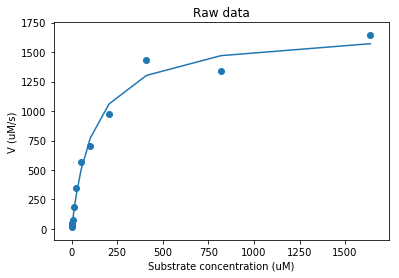

In [62]:
plt.plot(substrate_concentration, v(substrate_concentration,*popt))
plt.scatter(substrate_concentration,velocity)
plt.xlabel('Substrate concentration (uM)') #Labeling the axes
plt.ylabel('V (uM/s)')
plt.title('Raw data') #Giving the plot a title